# Data Importing

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from tensorflow.random import set_seed
from tensorflow.keras.layers import Input,Dense,concatenate,Dropout
from tensorflow.keras.models import Model,load_model
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras.metrics import MeanAbsoluteError,MeanSquaredError,Accuracy,Precision,Recall

from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
np.random.seed(1234)
set_seed(1234)

In [5]:
boston=pd.read_csv('/content/boston.csv')
oj_dmy=pd.read_csv('/content/OJ Preprocessed.csv')

In [6]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [7]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


# Data Preprocessing

In [8]:
#Untuk Data Regresi
X=boston.drop(['MEDV'],axis=1)
Y=boston['MEDV']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [9]:
reg_scaler=StandardScaler()
X_train=reg_scaler.fit_transform(X_train)
X_test=reg_scaler.transform(X_test)

In [10]:
#Untuk Data Klasifikasi
X_oj=oj_dmy.drop(['Purchase'],axis=1)
Y_oj=oj_dmy['Purchase']
X_trainc,X_testc,Y_trainc,Y_testc=train_test_split(X_oj,Y_oj,test_size=0.3)

In [11]:
clsb_scaler=StandardScaler()
X_trainc=clsb_scaler.fit_transform(X_trainc)
X_testc=clsb_scaler.transform(X_testc)

In [12]:
#Untuk Data Klasifikasi (OJ)
X_trainc,X_testc,Y_trainc,Y_testc=train_test_split(X_oj,Y_oj,test_size=0.3)

# MLP Regresi

In [13]:
#Model MLP Regresi
inputs=Input(shape=X_train.shape[1:])
layers=Dense(10,activation='relu')(inputs)
layers=Dense(10,activation='relu')(layers)
output=Dense(1)(layers)
model=Model(inputs=[inputs],outputs=[output])

model.compile(loss="mean_squared_error", optimizer=Adam(learning_rate=1e-3), 
              metrics=[MeanAbsoluteError(),MeanSquaredError()])

In [14]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense (Dense)               (None, 10)                140       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 261
Trainable params: 261
Non-trainable params: 0
_________________________________________________________________


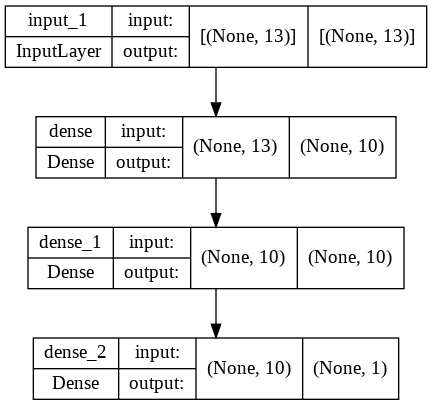

In [15]:
plot_model(model, "Model MLP Regresi.png", show_shapes=True)

In [16]:
history=model.fit(X_train,Y_train,epochs=100,validation_data=(X_test,Y_test))

Epoch 1/100
12/12 [==============================] - 3s 23ms/step - loss: 563.2423 - mean_absolute_error: 22.0135 - mean_squared_error: 563.2423 - val_loss: 568.6993 - val_mean_absolute_error: 21.9596 - val_mean_squared_error: 568.6993
Epoch 2/100
12/12 [==============================] - 0s 7ms/step - loss: 551.8934 - mean_absolute_error: 21.7602 - mean_squared_error: 551.8934 - val_loss: 556.1451 - val_mean_absolute_error: 21.6829 - val_mean_squared_error: 556.1451
Epoch 3/100
12/12 [==============================] - 0s 7ms/step - loss: 540.1531 - mean_absolute_error: 21.5027 - mean_squared_error: 540.1531 - val_loss: 542.5837 - val_mean_absolute_error: 21.3834 - val_mean_squared_error: 542.5837
Epoch 4/100
12/12 [==============================] - 0s 7ms/step - loss: 527.5174 - mean_absolute_error: 21.2248 - mean_squared_error: 527.5174 - val_loss: 528.1372 - val_mean_absolute_error: 21.0570 - val_mean_squared_error: 528.1372
Epoch 5/100
12/12 [==============================] - 0s 6ms

<Figure size 432x288 with 0 Axes>

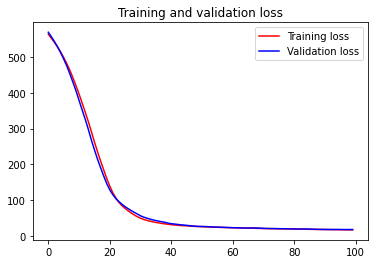

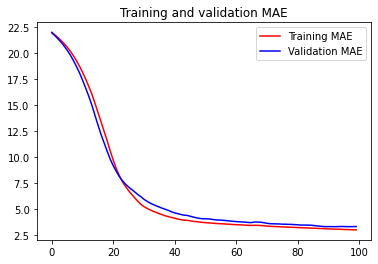

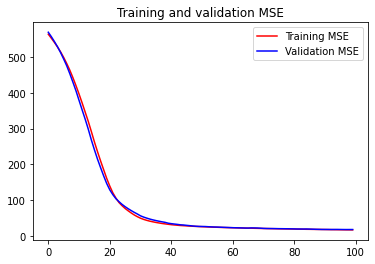

<Figure size 432x288 with 0 Axes>

In [17]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

loss=history.history['loss']
val_loss=history.history['val_loss']
mae=history.history['mean_absolute_error']
val_mae=history.history['val_mean_absolute_error']
mse=history.history['mean_squared_error']
val_mse=history.history['val_mean_squared_error']

epochs=range(len(loss))

plt.plot(epochs, loss, 'r', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label ='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

plt.plot(epochs, mae, 'r', label = 'Training MAE')
plt.plot(epochs, val_mae, 'b', label ='Validation MAE')
plt.title('Training and validation MAE')
plt.legend()
plt.figure()

plt.plot(epochs, mse, 'r', label = 'Training MSE')
plt.plot(epochs, val_mse, 'b', label ='Validation MSE')
plt.title('Training and validation MSE')
plt.legend()
plt.figure()

In [18]:
test_eval=model.evaluate(X_test, Y_test)
for name, value in zip(model.metrics_names, test_eval):
  print(name, ': ', value)
print()

5/5 [==============================] - 0s 4ms/step - loss: 18.0958 - mean_absolute_error: 3.2895 - mean_squared_error: 18.0958
loss :  18.095773696899414
mean_absolute_error :  3.289456844329834
mean_squared_error :  18.095773696899414



In [19]:
Y_pred=model.predict(X_test)

In [20]:
#Simpan model
model.save("MLP Regresi.h5")

In [21]:
#Memuat (load) model 
model=load_model("MLP Regresi.h5")
Y_pred=model.predict(X_test)

# MLP Klasifikasi

In [22]:
#Model MLP Klasifikasi Biner
inputs=Input(shape=X_trainc.shape[1:])
layers=Dense(20,activation='relu')(inputs)
layers=Dense(10,activation='relu')(layers)
output=Dense(1,activation='sigmoid')(layers)
model2=Model(inputs=[inputs],outputs=[output])

model2.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=1e-3), 
              metrics=["accuracy",Precision(),Recall()])

In [23]:
model2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 17)]              0         
                                                                 
 dense_3 (Dense)             (None, 20)                360       
                                                                 
 dense_4 (Dense)             (None, 10)                210       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 581
Trainable params: 581
Non-trainable params: 0
_________________________________________________________________


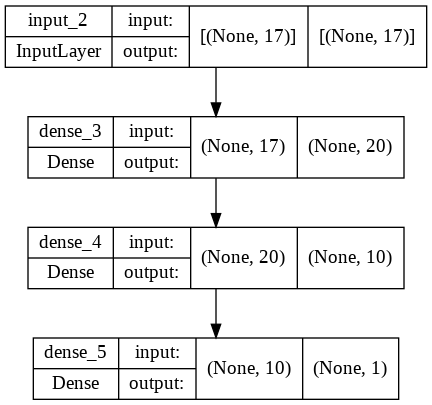

In [24]:
plot_model(model2, "Model MLP Klasifikasi Biner.png", show_shapes=True)

In [25]:
history2=model2.fit(X_trainc,Y_trainc,epochs=100,validation_data=(X_testc,Y_testc))

Epoch 1/100
24/24 [==============================] - 3s 37ms/step - loss: 5.6667 - accuracy: 0.5915 - precision: 0.6033 - recall: 0.9077 - val_loss: 2.0679 - val_accuracy: 0.3489 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/100
24/24 [==============================] - 0s 9ms/step - loss: 1.0943 - accuracy: 0.5287 - precision: 0.6004 - recall: 0.6126 - val_loss: 0.7986 - val_accuracy: 0.5047 - val_precision: 0.9167 - val_recall: 0.2632
Epoch 3/100
24/24 [==============================] - 0s 8ms/step - loss: 0.7070 - accuracy: 0.5474 - precision: 0.6082 - recall: 0.6644 - val_loss: 0.6605 - val_accuracy: 0.6075 - val_precision: 0.8268 - val_recall: 0.5024
Epoch 4/100
24/24 [==============================] - 0s 8ms/step - loss: 0.6633 - accuracy: 0.5995 - precision: 0.6469 - recall: 0.7140 - val_loss: 0.5858 - val_accuracy: 0.6511 - val_precision: 0.6844 - val_recall: 0.8612
Epoch 5/100
24/24 [==============================] - 0s 8ms/step - loss: 0.6555 - accuracy: 0.5821 

<Figure size 432x288 with 0 Axes>

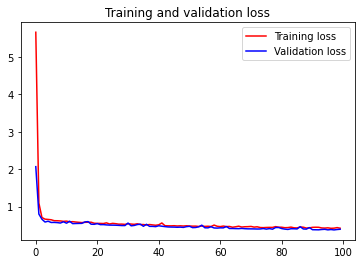

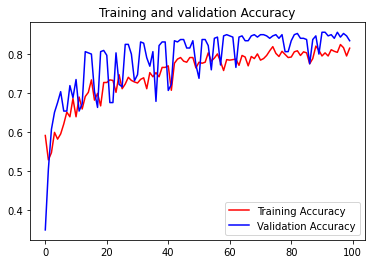

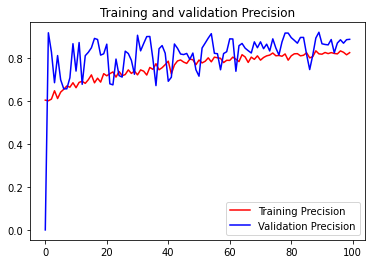

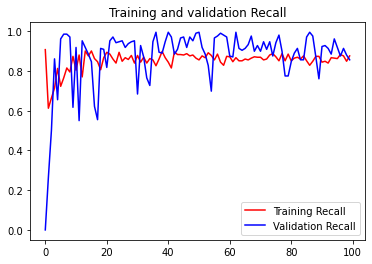

<Figure size 432x288 with 0 Axes>

In [26]:
%matplotlib inline

loss=history2.history['loss']
val_loss=history2.history['val_loss']
acc=history2.history['accuracy']
val_acc=history2.history['val_accuracy']
prec=history2.history['precision']
val_prec=history2.history['val_precision']
rec=history2.history['recall']
val_rec=history2.history['val_recall']

epochs=range(len(acc))

plt.plot(epochs, loss, 'r', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label ='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label ='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, prec, 'r', label = 'Training Precision')
plt.plot(epochs, val_prec, 'b', label ='Validation Precision')
plt.title('Training and validation Precision')
plt.legend()
plt.figure()

plt.plot(epochs, rec, 'r', label = 'Training Recall')
plt.plot(epochs, val_rec, 'b', label ='Validation Recall')
plt.title('Training and validation Recall')
plt.legend()
plt.figure()

In [27]:
test2_eval=model2.evaluate(X_testc, Y_testc)
for name, value in zip(model2.metrics_names, test2_eval):
  print(name, ': ', value)
print()

11/11 [==============================] - 0s 4ms/step - loss: 0.3924 - accuracy: 0.8349 - precision: 0.8861 - recall: 0.8565
loss :  0.39237675070762634
accuracy :  0.8348909616470337
precision :  0.8861386179924011
recall :  0.8564593195915222



In [28]:
Y_predc=model2.predict(X_testc)

In [29]:
Y_predc

array([[0.9828042 ],
       [0.7687719 ],
       [0.7963302 ],
       [0.07603576],
       [0.11535542],
       [0.8197399 ],
       [0.77260256],
       [0.97839797],
       [0.75459206],
       [0.10690928],
       [0.7917503 ],
       [0.61544085],
       [0.71554565],
       [0.12094015],
       [0.0965298 ],
       [0.833318  ],
       [0.5967648 ],
       [0.8845479 ],
       [0.91074497],
       [0.66781336],
       [0.14126164],
       [0.11530495],
       [0.8658699 ],
       [0.8286317 ],
       [0.65039754],
       [0.12343968],
       [0.87948066],
       [0.9105211 ],
       [0.23459078],
       [0.93055046],
       [0.82813096],
       [0.24715005],
       [0.80815744],
       [0.86894596],
       [0.9145757 ],
       [0.21459149],
       [0.97519785],
       [0.51351196],
       [0.17340417],
       [0.20541123],
       [0.9769991 ],
       [0.88943845],
       [0.5676445 ],
       [0.76705426],
       [0.26460373],
       [0.5642132 ],
       [0.17782459],
       [0.184

In [30]:
y_predc=np.zeros(Y_predc.shape)
y_predc[Y_predc>0.5]=1
y_predc=np.array(y_predc)
y_predc

array([[1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],

In [31]:
print(classification_report(Y_testc,y_predc))

              precision    recall  f1-score   support

           0       0.75      0.79      0.77       112
           1       0.89      0.86      0.87       209

    accuracy                           0.83       321
   macro avg       0.82      0.83      0.82       321
weighted avg       0.84      0.83      0.84       321



In [32]:
prediksi=pd.DataFrame(y_predc)
prediksi.rename(columns={0:'y'}, inplace=True)
prediksi=prediksi.astype(int)
prediksi.to_csv('Hasil Prediksi MLP Klasifikasi Biner.csv',index=False)

In [33]:
#Simpan model
model2.save("MLP Klasifikasi Biner.h5")

In [34]:
#Memuat (load) model 
model2=load_model("MLP Klasifikasi Biner.h5")
Y_predc=model2.predict(X_testc)

In [35]:
#Model MLP Klasifikasi Biner (Alternatif)
inputs=Input(shape=X_trainc.shape[1:])
layers1=Dense(20,activation='relu')(inputs)
layers2=Dense(10,activation='relu')(layers1)
concat=concatenate([inputs,layers1,layers2])
output=Dense(1,activation='sigmoid')(concat)
model2_1=Model(inputs=[inputs],outputs=[output])

model2_1.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=1e-3), 
              metrics=["accuracy",Precision(),Recall()])

In [36]:
model2_1.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 17)]         0           []                               
                                                                                                  
 dense_6 (Dense)                (None, 20)           360         ['input_3[0][0]']                
                                                                                                  
 dense_7 (Dense)                (None, 10)           210         ['dense_6[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 47)           0           ['input_3[0][0]',                
                                                                  'dense_6[0][0]',          

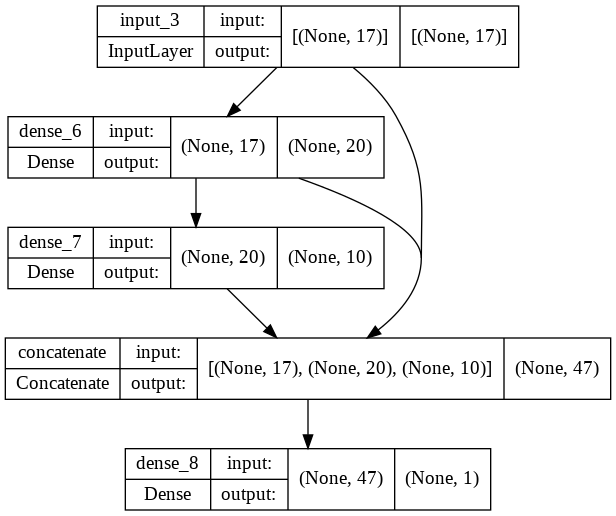

In [37]:
plot_model(model2_1, "Model MLP 2 Klasifikasi Biner.png", show_shapes=True)

In [38]:
history2_1=model2_1.fit(X_trainc,Y_trainc,epochs=100,validation_data=(X_testc,Y_testc))

Epoch 1/100
24/24 [==============================] - 2s 26ms/step - loss: 0.8278 - accuracy: 0.5194 - precision_1: 0.5787 - recall_1: 0.6959 - val_loss: 0.6538 - val_accuracy: 0.6511 - val_precision_1: 0.6511 - val_recall_1: 1.0000
Epoch 2/100
24/24 [==============================] - 0s 9ms/step - loss: 0.6851 - accuracy: 0.5434 - precision_1: 0.5733 - recall_1: 0.8986 - val_loss: 0.6557 - val_accuracy: 0.6386 - val_precision_1: 0.6495 - val_recall_1: 0.9665
Epoch 3/100
24/24 [==============================] - 0s 8ms/step - loss: 0.6779 - accuracy: 0.5674 - precision_1: 0.5831 - recall_1: 0.9482 - val_loss: 0.6660 - val_accuracy: 0.5514 - val_precision_1: 0.6327 - val_recall_1: 0.7416
Epoch 4/100
24/24 [==============================] - 0s 9ms/step - loss: 0.6754 - accuracy: 0.5688 - precision_1: 0.6020 - recall_1: 0.8041 - val_loss: 0.6445 - val_accuracy: 0.6231 - val_precision_1: 0.6467 - val_recall_1: 0.9282
Epoch 5/100
24/24 [==============================] - 0s 9ms/step - loss: 0.

<Figure size 432x288 with 0 Axes>

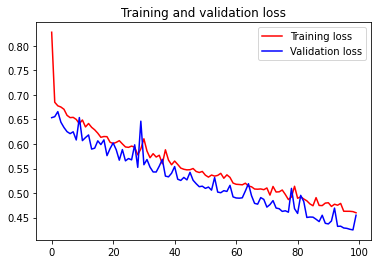

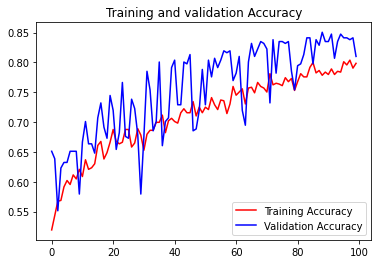

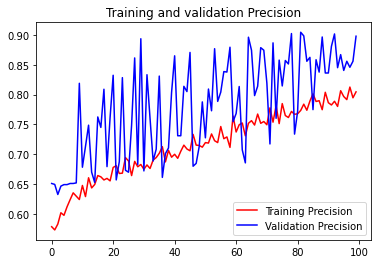

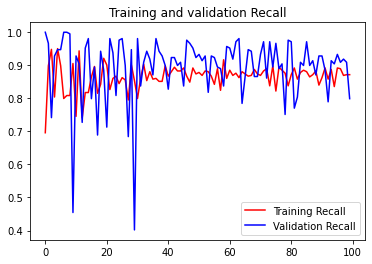

<Figure size 432x288 with 0 Axes>

In [39]:
%matplotlib inline

loss=history2_1.history['loss']
val_loss=history2_1.history['val_loss']
acc=history2_1.history['accuracy']
val_acc=history2_1.history['val_accuracy']
prec=history2_1.history['precision_1']
val_prec=history2_1.history['val_precision_1']
rec=history2_1.history['recall_1']
val_rec=history2_1.history['val_recall_1']

epochs=range(len(acc))

plt.plot(epochs, loss, 'r', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label ='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label ='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, prec, 'r', label = 'Training Precision')
plt.plot(epochs, val_prec, 'b', label ='Validation Precision')
plt.title('Training and validation Precision')
plt.legend()
plt.figure()

plt.plot(epochs, rec, 'r', label = 'Training Recall')
plt.plot(epochs, val_rec, 'b', label ='Validation Recall')
plt.title('Training and validation Recall')
plt.legend()
plt.figure()

In [40]:
test2_1_eval=model2_1.evaluate(X_testc, Y_testc)
for name, value in zip(model2_1.metrics_names, test2_1_eval):
  print(name, ': ', value)
print()

11/11 [==============================] - 0s 4ms/step - loss: 0.4550 - accuracy: 0.8100 - precision_1: 0.8978 - recall_1: 0.7990
loss :  0.4549868702888489
accuracy :  0.8099688291549683
precision_1 :  0.897849440574646
recall_1 :  0.7990430593490601



In [41]:
Y_predc=model2_1.predict(X_testc)

In [42]:
Y_predc

array([[0.9559197 ],
       [0.6223389 ],
       [0.63508224],
       [0.15472253],
       [0.17977999],
       [0.6810481 ],
       [0.6254501 ],
       [0.9492031 ],
       [0.68113846],
       [0.20175038],
       [0.70548046],
       [0.57287323],
       [0.6280557 ],
       [0.21801938],
       [0.20174362],
       [0.7285233 ],
       [0.5712244 ],
       [0.77443963],
       [0.8173842 ],
       [0.7366781 ],
       [0.23431876],
       [0.1799273 ],
       [0.78304875],
       [0.70373946],
       [0.6188508 ],
       [0.23172776],
       [0.7641301 ],
       [0.7923915 ],
       [0.3207294 ],
       [0.8413971 ],
       [0.71876   ],
       [0.29955107],
       [0.7039062 ],
       [0.78978693],
       [0.87398124],
       [0.29517248],
       [0.93872786],
       [0.49846408],
       [0.25429633],
       [0.25789478],
       [0.9413899 ],
       [0.7529478 ],
       [0.5232235 ],
       [0.73928803],
       [0.30770823],
       [0.581986  ],
       [0.19871618],
       [0.292

In [43]:
y_predc=np.zeros(Y_predc.shape)
y_predc[Y_predc>0.5]=1
y_predc=np.array(y_predc)
y_predc

array([[1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],

In [44]:
print(classification_report(Y_testc,y_predc))

              precision    recall  f1-score   support

           0       0.69      0.83      0.75       112
           1       0.90      0.80      0.85       209

    accuracy                           0.81       321
   macro avg       0.79      0.81      0.80       321
weighted avg       0.82      0.81      0.81       321



In [45]:
prediksi=pd.DataFrame(y_predc)
prediksi.rename(columns={0:'y'}, inplace=True)
prediksi=prediksi.astype(int)
prediksi.to_csv('Hasil Prediksi MLP 2 Klasifikasi Biner.csv',index=False)

In [46]:
#Simpan model
model2_1.save("MLP 2 Klasifikasi Biner.h5")

In [47]:
#Memuat (load) model 
model2_1=load_model("MLP 2 Klasifikasi Biner.h5")
Y_predf=model2.predict(X_testc)